# Simple Linear Regression

## Load Dataset

In [116]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [117]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## Deskripsi dari Sample Dataset

In [118]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [119]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Simple Linear Regression

## Sample Dataset

Alasan saya mengambil features "PTRATIO" = Jumlah siswa yang bersekolah dibagi dengan jumlah guru di institusi,untuk mengetahui perbedaan harga rumah yang jumlah siswa dengan jumlah guru yang proper ataupun sebaliknya.

In [120]:
import pandas as pd

harga_rumah = {'pupil': [15.3, 17.8, 17.8, 18.7, 18.7], 
             'harga': [24, 21.6, 34.7, 33.4, 36.2]}

harga_rumah_df = pd.DataFrame(harga_rumah)
harga_rumah_df

,pupil,harga
0,15.3,24.0
1,17.8,21.6
2,17.8,34.7
3,18.7,33.4
4,18.7,36.2


* Membentuk dataset yang berisi daftar pupil dan harga rumah,dataset ini akan kita tampung ke dalam pandas Dataframe
* Baris kedua sebuah dictionary yang memiliki dua keys yaitu pupil dan harga.setiap key akan berasosiasi dengan list
* Dictionary ini akan kita tampung ke dalam variable "harga_rumah"

*Pembentukan Dataframe*
* pd.DataFrame,harga_rumah sebagai parameternya.objek akan ditampung ke dalam variable "harga_rumah_df"

*Nilai pupil berperan sebagai features*

*Nilai harga berperan sebagai targets*

## Visualisasi Data

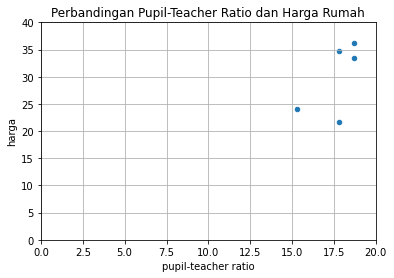

In [121]:
import matplotlib.pyplot as plt

harga_rumah_df.plot(kind='scatter', x='pupil', y='harga')

plt.title('Perbandingan Pupil-Teacher Ratio dan Harga Rumah')
plt.xlabel('pupil-teacher ratio')
plt.ylabel('harga')
plt.xlim(0, 20)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

* Sumbu X akan berasosiasi dengan pupil
* Sumbu Y akan berasosiasi dengan harga rumah
* setiap data point/marker (titik biru) dari hasil plotting akan mempresentasikan satu baris dari dataframe yang kita miliki
* dihasil tersebut membentuk seolah-olah hasil garis lurus,didalam model linear regression akan berkaitan dengan persamaan garis lurus

## Simple Linear Regression Model 

In [122]:
import numpy as np

X = np.array(harga_rumah_df['pupil'])
y = np.array(harga_rumah_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [15.3 17.8 17.8 18.7 18.7]
y: [24.  21.6 34.7 33.4 36.2]


Mengelompokkan features dan targets ke dua variabel terpisah,kita juga akan mengkonversi struktur data dari menggunakan pandas dataframe menjadi numpy array

In [123]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [124]:
X

array([[15.3],
       [17.8],
       [17.8],
       [18.7],
       [18.7]])

hasilnya adalah variable x menampung suatu array 2 dimensi dimana jumlah baris ada 5 dan jumlah kolom ada 1

### Training Simple Linear Regression Model

* Baris Kedua : Membuat Objek Model dengan memanggil "LinearRegression" dan objek yang terbentuk akan ditampung ke dalam variable "model"
* Baris Ketiga : Objek Model akan kita training dengan method fit.dengan membutuhkan dua parameter yaitu sekumpulan nilai features dan sekumpulan nilai target

In [125]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Objek Model sudah berstatus trained model/objek model yang sudah di training

### Visualisasi Simple Linear Regression Model

In [126]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

* Untuk menvisualisasikan persamaan garis maka yang pertama menyiapkan dua buah nilai untuk x/features yaitu nilai 0 dan nilai 25,kedua nilai ditentukan karena ingin melakukan plotting pada area berukuran 25x25 dan mengambil nilai terkecil dan nilai terbesarnya yaitu 0 dan 25.
* Kedua nilai tersebut akan dibentuk sebagai numpy array,akan kita reshape agar menghasilkan array 2 dimensi dengan memanggil variable "reshape" dengan nilai parameter (-1,1).nilai tersebut ditampungkan ke dalam variable "x_vis"
* Berdasarkan Hasil X_vis akan melakukan prediksi untuk nilai y, maka disini kita panggil "model.predict(X_vis)"

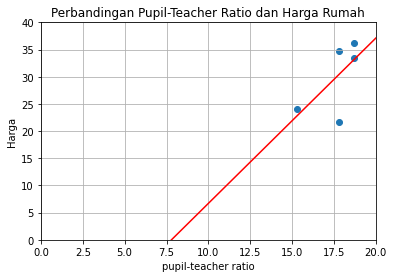

In [127]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Pupil-Teacher Ratio dan Harga Rumah')
plt.xlabel('pupil-teacher ratio')
plt.ylabel('Harga')
plt.xlim(0, 20)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

* Baris Pertama : X, y bukan x_vis dan y_vis dan digunakan untuk melakukan plotting marker berwarna biru
* Baris Kedua : menghasilkan garis merah. 

*Garis merah tersebut akan memiliki formula persamaan yang mengacu linear regression:*
* y = target
* x = features 

*Nilai parameter yang perlu kita pahami:*
* alpha = memrepresentasikan "Intercept",merupakan titik pada sumbu y dimana garis linear yang terbentuk menabrak suatu titik di sumbu y ketika sumbu x-nya bernilai 0.
* beta = memrepresentasikan "Slope",akan berpengaruh pada tingkat kemiringan dari garis linear yang terbentuk dimana nilai slope 0 akan menghasilkan garis horizontal.

In [128]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: -23.704400411734472
slope: [3.03988677]


* Untuk menampilkan nilai intercept bisa dengan memanggil objek model lalu kita panggil ".intercept_"
* Untuk menampilkan nilai slope bisa dengan memanggil objek model lalu kita panggil ".coef_"

### Mencari nilai slope

In [129]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[15.3]
 [17.8]
 [17.8]
 [18.7]
 [18.7]]

X flatten: [15.3 17.8 17.8 18.7 18.7]

y: [24.  21.6 34.7 33.4 36.2]


Untuk melakukan proses kalkulasi covariance dan variance,ada baiknya kita "flatten"-kan dulu atau  mengembalikan ke bentuk asalnya dengan menggunakan method flatten

#### Variance

In [130]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 1.9429999999999983


Proses hitung nilai variance dengan memanggil np.var dan membutuhkan 2 parameter. Parameter pertama adalah nilai dari variable x yang sudah di flatten dan parameter kedua yaitu ddof/dd of freedom di set sebagai 1.(pembelajaran statistika)

#### Covariance

In [131]:
np.cov(X.flatten(), y)

array([[ 1.943 ,  5.9065],
       [ 5.9065, 44.662 ]])

Proses hitung nilai covariance dengan memanggil np.cov dan membutuhkan 2 parameter. Parameter pertama adalah nilai dari variable x yang sudah di flatten dan parameter kedua yaitu y

In [132]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 5.906499999999997


#### Slope

In [133]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 3.039886773031396


*Setelah menemukan nilai variance dan covariance, kita dapat menggunakan untuk mencari nilai slope dengan formula diatas*

### Mencari nilai intercept

In [134]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: -23.704400411734458


Nilai intercept diperoleh dengan cara menselisihkan nilai rata-rata dari y/target diselisihkan dengan hasil perkalian antara slope dan nilai rata-rata dari x

### Prediksi Harga Rumah

In [135]:
pupil_town = np.array([14, 21, 26]).reshape(-1, 1)
pupil_town

array([[14],
       [21],
       [26]])

Prediksi harga pizza ditentukan berdasarkan tiga nilai diameternya yaitu 14 21 dan 26 sebagai features yang mau diprediksi. Lalu 3 nilai tersebut kita bundle menjadi suatu numpy array,karena kita hanya memiliki satu nilai features,yaitu "pupil" saja,maka array perlu kita reshape menjadi array dua dimensi.array yang terbentuk ditampung ke dalam variable "pupil_town"

In [136]:
prediksi_harga = model.predict(pupil_town)
prediksi_harga

array([18.85401441, 40.13322182, 55.33265569])

In [137]:
for ppl, hrg in zip(pupil_town, prediksi_harga):
    print(f'pupil: {ppl} prediksi harga: {hrg}')

pupil: [14] prediksi harga: 18.85401441070508
pupil: [21] prediksi harga: 40.13322182192486
pupil: [26] prediksi harga: 55.332655687081854


Proses prediksi harga rumah dengan output 3 harga rumah yang diprediksi

### Evaluasi Simple Linear Regression Model

#### Training & Testing Dataset

In [138]:
X_train = np.array([15.3, 17.8, 17.8, 18.7, 18.7]).reshape(-1, 1)
y_train = np.array([24, 21.6, 34.7, 33.4, 36.2])

X_test = np.array([14.7, 16.9, 18.1, 19.8, 17.3]).reshape(-1, 1)
y_test = np.array([23, 22.3, 33.5, 32.5, 36.1])

X_train dan y_train langsung bentuk mengunakan numpy array.karena terdiri dari satu features sedangkan scikit learn membutuhkan features dalam bentuk array dalam dua dimensi,maka kita perlu reshape.

#### Training Simple Linear Regression Model

In [139]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Membentuk kembali objek model untuk kita training dengan memanggil linear regression.lalu ditampung ke dalam variable model,obyek modelnya kita training dengan memanggil method fit dengan menyertakan x_train dan y_train sebagai parameternya.

#### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ($R^2$)

In [140]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.3507497391878789


* Import metrics evaluasi dengan cara memanggil "sklearn.metrics" lalu import yaitu "r2_score"
* Prediksi nilai target dengan memanfaatkan nilai features pada testing set yaitu "model.predict(X_test)"
* Memiliki y hasil prediksi dan juga nilai y real (y_test) untuk mengukur/bandingkan dengan memanggil "r2score" dan dua parameter yaitu nilai (y_test, y_pred)
* R-squared semakin mendekati 1 semakin baik dan semakin menjauhi/mendekati 0 maka semakin buruk.Jika kita memiliki kualitasnya benar-benar buruk sekali maka kita akan mendapatkan nilai (-).

### Mencari nilai R-squared ($R^2$)

$SS_{res}$

In [141]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 105.59925642056989


$SS_{tot}$

In [142]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 162.64800000000002


Setelah mendapatkan nilai 𝑆𝑟𝑒𝑠 dan 𝑆𝑆𝑡𝑜𝑡, hasil dapat digunakan untuk mencari nilai R-Squared dengan menggunakan cara dibawah

$R^2$

In [143]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.3507497391878789
